# 03 Baseline Study

In this notebook, we load the (standard) preprocessed data and train several basic models to establish a baseline for comparison.

The following models are trained as part of this baseline study:
- Least Squares Regression
- MSE Regression with Gradient Descent
- MSE Regression with Stochastic Gradient Descent
- Ridge Regression
- Logistic Regression
- L2-Regularized Logistic Regression
- L1-Regularized Logistic Regression

In [7]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# Imports
import sys
import os

import numpy as np

from data_loading import load_data
from data_exploration import print_dataset_info
from utils import stratified_split
from models import (
    least_squares,
    logistic_regression,
    mean_squared_error_gd,
    mean_squared_error_sgd,
    reg_l2_logistic_regression,
    reg_l1_logistic_regression,
)
from train_pipeline import train_and_test
from implementations import ridge_regression

#### Preprocessed data loading

In [11]:
# Load and preprocessed data (~2 minutes)
data_path = "../data"
x_train, x_test, y_train, train_ids, test_ids, feature_names, feature_dict = load_data(data_path, preprocessed=True)

Loading raw data...
Data loaded.
Preprocessing data...
Data preprocessed.


In [12]:
# Print information about the dataset
print_dataset_info(x_train, y_train, x_test, feature_dict)

Dataset Information

Training Data
328135 samples
With labels: [0 1]
0: 91.17%
and 1: 8.83%

Test Data
109379 samples

Features
440 features:
The first column of the datasets is the "sample id" and is not in the dictionary



#### Hyperparameters and dataset settings

In [13]:
# Define hyperparameters
hyperparameters = {
    "initial_w": np.zeros(x_train.shape[1]),
    "max_iters": 2500,
    "gamma": 0.001,
    "lambda_": 0.01,
}

# Split the data
x_train_new, y_train_new, _, x_val, y_val, _ = stratified_split(x_train, y_train, train_ids)

#### Least Squares Regression

In [14]:
(w, loss), metrics = train_and_test(x_train_new, y_train_new, x_val, y_val, least_squares, metrics='f1', verbose=True, **hyperparameters)
# should manage mulitcoliinearity to avoid using pseudo inverse

Model specific parameters:

Training model...
Matrix is singular; using pseudo-inverse.
Training done in 3.10 s with last loss: 0.03322
Metrics: Accuracy = 0.347, F1 Score = 0.210
Training and evaluation complete.
Results saved in ../results/logs/least_squares_20241030174233


#### MSE Regression with Gradient Descent

Model specific parameters:
    max_iters: 2500
    gamma: 0.001

Training model...
Training done in 3 min 59.41 s with last loss: 0.03452


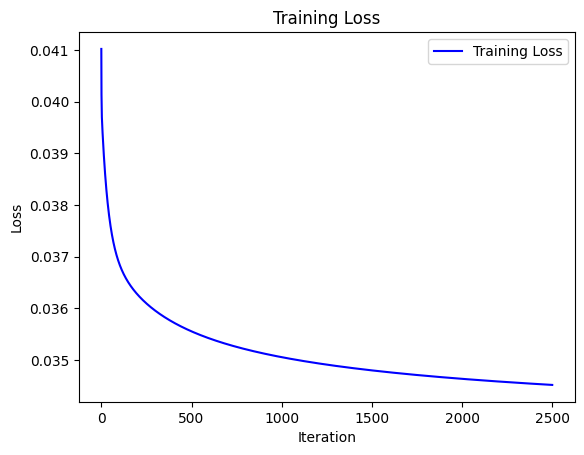

Metrics: Accuracy = 0.303, F1 Score = 0.201
Training and evaluation complete.
Results saved in ../results/logs/mean_squared_error_gd_20241030174633


In [15]:
# (~4 minutes with 2500)
(w, loss), metrics = train_and_test(
    x_train_new, y_train_new, x_val, y_val, mean_squared_error_gd, metrics="f1", verbose=True, **hyperparameters
)

#### MSE Regression with Stochastic Gradient Descent

Model specific parameters:
    max_iters: 2500
    gamma: 0.001

Training model...
Training done in 42.92 s with last loss: 0.04011


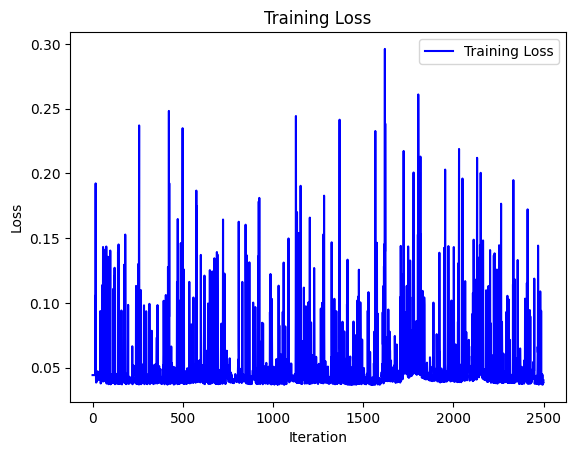

Metrics: Accuracy = 0.571, F1 Score = 0.265
Training and evaluation complete.
Results saved in ../results/logs/mean_squared_error_sgd_20241030174716


In [16]:
(w, loss), metrics = train_and_test(
    x_train_new, y_train_new, x_val, y_val, mean_squared_error_sgd, metrics="f1", verbose=True, **hyperparameters
)

#### Ridge Regression

In [17]:
(w, loss), metrics = train_and_test(
    x_train_new, y_train_new, x_val, y_val, ridge_regression, metrics="f1", verbose=True, **hyperparameters
)

Model specific parameters:
    lambda_: 0.01

Training model...
Training done in 1.15 s with last loss: 0.03352
Metrics: Accuracy = 0.324, F1 Score = 0.205
Training and evaluation complete.
Results saved in ../results/logs/ridge_regression_20241030174717


#### Logistic Regression

Model specific parameters:
    max_iters: 2500
    gamma: 0.001

Training model...
Training done in 4 min 11.56 s with last loss: 0.24674


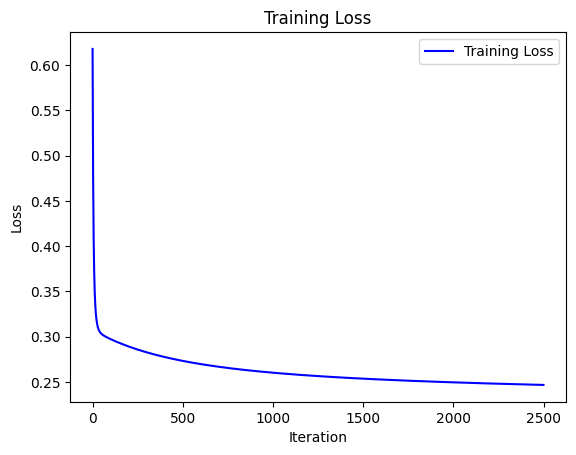

Metrics: Accuracy = 0.912, F1 Score = 0.003
Training and evaluation complete.
Results saved in ../results/logs/logistic_regression_20241030175129


In [18]:
(w, loss), metrics = train_and_test(
    x_train_new, y_train_new, x_val, y_val, logistic_regression, metrics="f1", verbose=True, **hyperparameters
)

#### L2-Regularized Logistic Regression

Model specific parameters:
    max_iters: 2500
    gamma: 0.001
    lambda_: 0.01

Training model...
Training done in 4 min 18.10 s with last loss: 0.24719


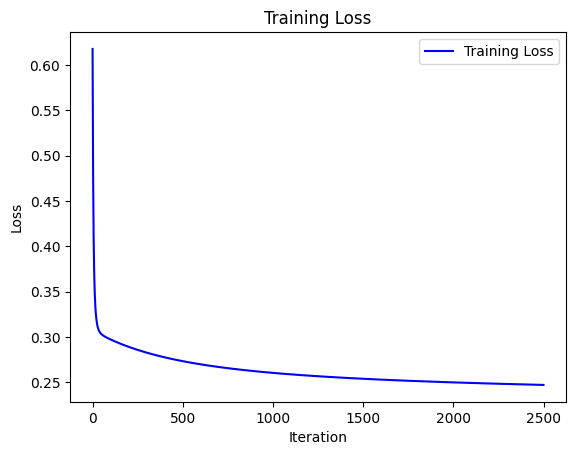

Metrics: Accuracy = 0.912, F1 Score = 0.002
Training and evaluation complete.
Results saved in ../results/logs/reg_l2_logistic_regression_20241030175547


In [19]:
(w, loss), metrics = train_and_test(
    x_train_new, y_train_new, x_val, y_val, reg_l2_logistic_regression, metrics="f1", verbose=True, **hyperparameters
)

#### L1-Regularized Logistic Regression

Model specific parameters:
    max_iters: 2500
    gamma: 0.001
    lambda_: 0.01

Training model...
Training done in 4 min 25.94 s with last loss: 0.25672


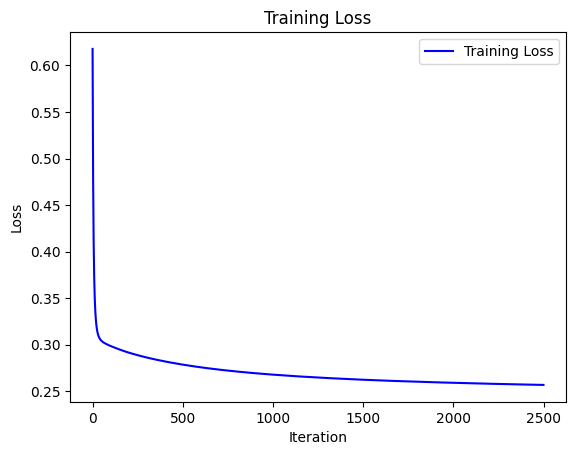

Metrics: Accuracy = 0.912, F1 Score = 0.000
Training and evaluation complete.
Results saved in ../results/logs/reg_l1_logistic_regression_20241030180013


In [20]:
(w, loss), metrics = train_and_test(
    x_train_new, y_train_new, x_val, y_val, reg_l1_logistic_regression, metrics="f1", verbose=True, **hyperparameters
)